In [28]:
%load_ext autoreload
%autoreload 2

from PIL import Image
from detector import Detector
import numpy as np
import torch
import cv2
from torchvision.utils import draw_bounding_boxes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


YOLOv5 🚀 v6.0-166-g968e300 torch 1.10.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1660, 5937MiB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients
Adding AutoShape... 


tensor([[5.19620e+02, 7.64984e+01, 6.05797e+02, 1.82670e+02, 8.53922e-01, 1.00000e+00],
        [2.09756e+02, 9.31238e+01, 3.40832e+02, 2.37721e+02, 7.78513e-01, 1.00000e+00],
        [6.11642e+02, 2.32614e+02, 7.01807e+02, 3.29304e+02, 7.40120e-01, 1.00000e+00],
        [1.90330e+02, 3.61572e+00, 2.37133e+02, 5.86950e+01, 7.11368e-01, 1.00000e+00],
        [1.43653e+02, 6.48623e+01, 2.16003e+02, 1.60213e+02, 6.50046e-01, 1.00000e+00]], device='cuda:0')


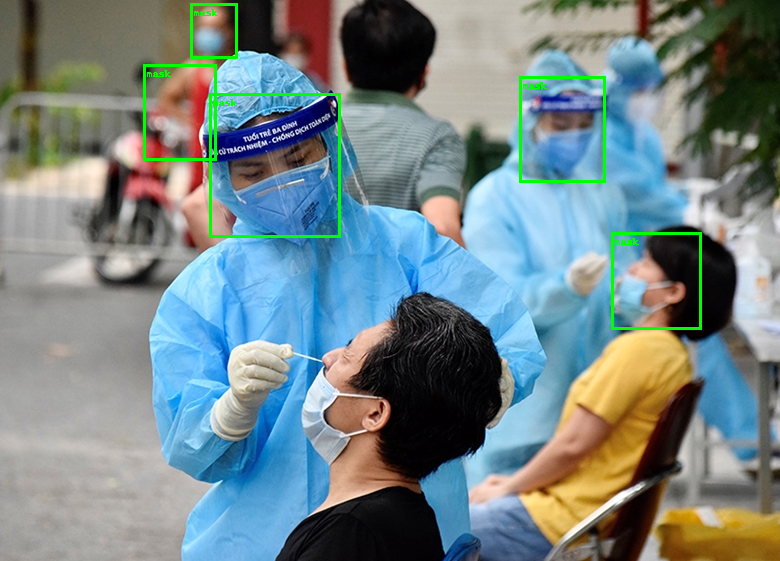

In [32]:
detector = Detector(confidence=0.5)

input_img = Image.open('input/duy-khanhs.jpg')

input_array = np.asarray(input_img)

res = detector.detect(input_array)

output_img = Image.fromarray(res)

display(output_img)


In [76]:
valid_tensor = torch.tensor([[True], [False], [False], [False], [False]])

valid_tensor = torch.tensor([[False]] * 5)

valid_tensor[2, 0] = True


a = torch.tensor([[i, i] for i in range(5)])


print(a.size())
print(valid_tensor)

print(any(valid_tensor))



# print(a, valid_tensor)

# print(torch.masked(a, valid_tensor))

b = a[valid_tensor.repeat(1, 2)]

torch.unsqueeze(b, dim=0)


# print(a[valid_tensor > 0])

torch.Size([5, 2])
tensor([[False],
        [False],
        [ True],
        [False],
        [False]])
True


tensor([[2, 2]])

In [20]:
type(output.imgs[0])

numpy.ndarray

In [19]:
output2 = detector.model(input_img)

type(output2.imgs[0])

numpy.ndarray

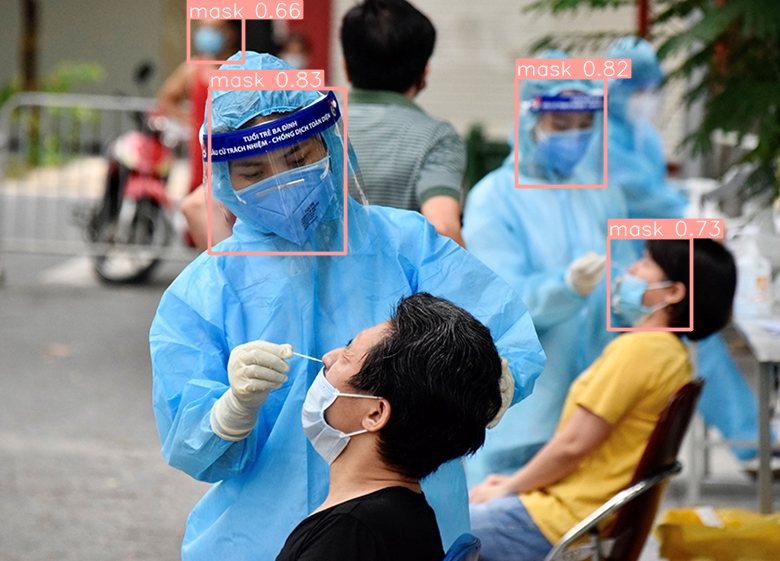

In [22]:
display(Image.fromarray(output2.render()[0]))

In [26]:
output2.pred[0].shape

torch.Size([4, 6])

tensor([[2.09292e+02, 8.89719e+01, 3.45122e+02, 2.53552e+02, 8.31639e-01, 1.00000e+00],
        [5.16713e+02, 7.79503e+01, 6.05796e+02, 1.86204e+02, 8.22535e-01, 1.00000e+00],
        [6.08899e+02, 2.37727e+02, 6.91965e+02, 3.29140e+02, 7.29291e-01, 1.00000e+00],
        [1.88481e+02, 0.00000e+00, 2.43775e+02, 6.20683e+01, 6.58048e-01, 1.00000e+00]], device='cuda:0')
torch.Size([4, 4])
['no_mask', 'mask', 'incorrect_mask']


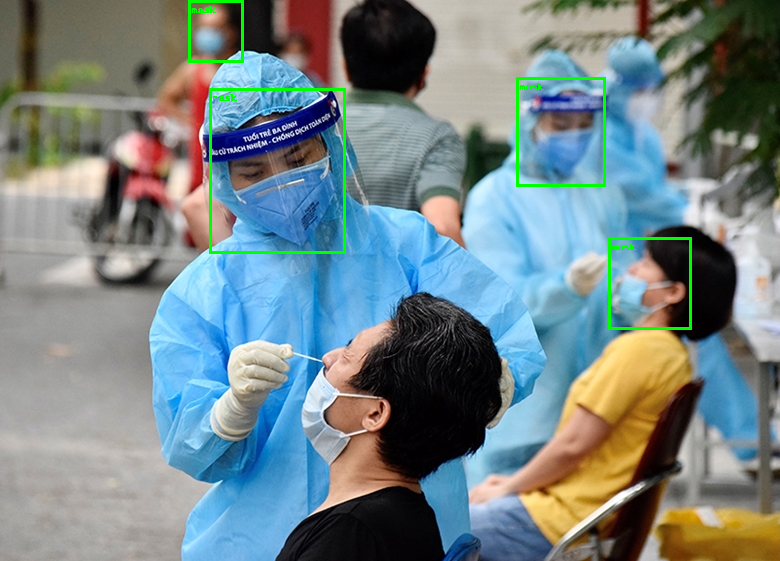

In [87]:
input_tensor = torch.from_numpy(input_array).permute(2, 0, 1)



# print(output2.names)

print(output2.pred[0])

print(output2.pred[0][:, :-2].size())

print(output2.names)

labels = [output2.names[int(x)] for x in output2.pred[0][:, -1]]
colors = [(255, 0, 0), (0, 255, 0), (128, 0, 128)]

box_colors = [colors[int(x)] for x in output2.pred[0][:, -1]]

out = draw_bounding_boxes(input_tensor, boxes=output2.pred[0][:, :-2], labels=labels, colors=box_colors, width=3)

# display(Image.fromarray(out))


import torchvision.transforms.functional as F
# load the image (creating a random image as an example)
# img_data = torch.ByteTensor(4, 4, 3).random_(0, 255).numpy()

img_data = out.permute(1, 2, 0).numpy()
pil_image = F.to_pil_image(img_data)

display(pil_image)
